<a href="https://colab.research.google.com/github/tugsaporn-li/project/blob/main/Titanic%20-%20Machine%20Learning/Titanic_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Exploratory Data Analysis (EDA)

In [3]:
# load data
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/tugsaporn-li/project/refs/heads/main/Titanic%20-%20Machine%20Learning/train.csv")

In [4]:
# how many rows and olumns
df.shape

(891, 12)

In [5]:
# Let's have a look on top 5 rows of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Let's have a look on the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
# ดูค่าสถิติพื้นฐาน
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. ข้อมูลมีทั้งหมด 891 คน
2. คอลัมน์ Age, Cabin, Embarked ข้อมูลหายไป
3. mean ของ Survived คือ 0.3838 แปลว่ามีคนรอดชีวิตเพียง 38.38% จากข้อมูลทั้งหมด 891 คน
4. mean ของ Fare คือ 32.20 แต่ Max คือ 512.32 แสดงว่ามีคนส่วนน้อยที่จ่ายค่าตั๋วแพงมาก (Outliers) และแปลว่าข้อมูลนี้เบ้ขวา

In [9]:
# ดูจำนวนคนแยกตามเพศ
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [10]:
# ดูอัตราการรอดชีวิตแยกตามเพศ
df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


เพศหญิงมีอัตราการรอดชีวิตสูงถึง 74.2% เพศชายมีอัตราการรอดชีวิตเพียง 18.8% เท่านั้น

In [11]:
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


ผู้โดยสารชั้น 1 รอดชีวิตสูงที่สุดถึง 62%, ชั้น 2 อยู่ที่ 47% และลดลงจนเหลือเพียง 24% ในชั้น 3

In [12]:
df.groupby('Embarked')['Survived'].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


คนขึ้นจากท่าเรือ C (Cherbourg) มีอัตราการรอดสูงกว่าจากท่าเรืออื่นๆ (อาจเป็นเพราะคนกลุ่มนี้ซื้อตั๋วชั้น 1 มากที่สุด)

In [13]:
embarked_pclass_pct = pd.crosstab(df['Embarked'], df['Pclass'], normalize='index') * 100
embarked_pclass_pct

Pclass,1,2,3
Embarked,,,
C,50.595238,10.119048,39.285714
Q,2.597403,3.896104,93.506494
S,19.720497,25.465839,54.813665


In [15]:
# ผู้หญิงในชั้น 1 มีอัตราการรอดชีวิตสูงกว่าผู้หญิงในชั้น 3 หรือไม่
df.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


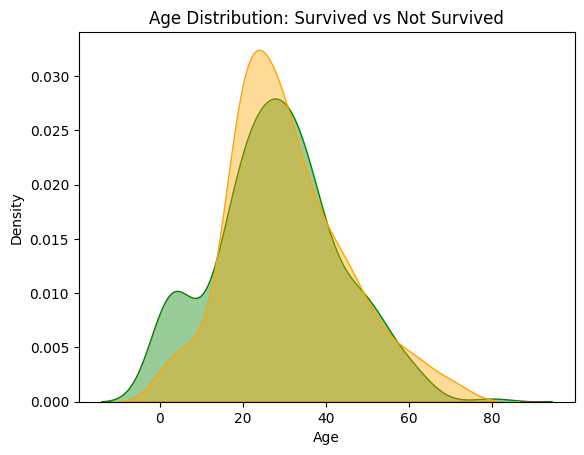

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# กราฟเปรียบเทียบการกระจายของอายุระหว่างคนรอด (1) และคนไม่รอด (0)
sns.kdeplot(df[df['Survived'] == 1]['Age'], fill=True, color='green', alpha=0.4, label='Survived')
sns.kdeplot(df[df['Survived'] == 0]['Age'], fill=True, color='orange', alpha=0.4, label='Not Survived')

plt.title('Age Distribution: Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

1. ช่วงอายุ 0-10 ปี (เด็ก): กราฟสีเขียว (Survived) สูงกว่าสีแดง (Not Survived) แสดงว่าเด็กมีโอกาสรอดชีวิตสูงกว่ากลุ่มอื่น

2. ช่วงอายุ 20-35 ปี: เป็นช่วงที่มีผู้โดยสารหนาแน่นที่สุด และมีอัตราการเสียชีวิตสูงกว่าการรอดชีวิต

3. ช่วงอายุ 35 ปีขึ้นไป พื้นที่สีทั้งสองเริ่มแบนราบและซ้อนทับกัน

In [17]:
# ค่าเฉลี่ยอายุจัดกลุ่มตามชั้นตั๋ว
df.groupby('Pclass')['Age'].median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


ผู้โดยสารชั้น 1 มักจะมีอายุมากกว่า

In [18]:
age_nan_df = df[df['Age'].isnull()]
age_nan_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


# 2. Data Cleaning


## Missing Value Imputation

Age: หายไป 177 ค่า การใช้ค่าเฉลี่ยอาจไม่แม่นยำนัก จึงใช้ค่า Median ของแต่ละ Pclass เพราะคนรวย (ชั้น 1) มักจะมีอายุเฉลี่ยสูงกว่าคนชั้น 3



In [19]:
df1 = df.copy()
df1['Age'] = df1.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

Embarked: หายไปแค่ 2 ค่า ใช้ Mode (ค่าที่พบมากที่สุดคือ 'S') เติม

In [20]:
df1['Embarked'] = df1['Embarked'].fillna(df1['Embarked'].mode()[0])

## Categorical Encoding

Sex: เปลี่ยน male เป็น 0 และ female เป็น 1



In [21]:
df1['Sex'] = df1['Sex'].map({'female': 1, 'male': 0})

Embarked: ใช้เทคนิค One-Hot Encoding

In [22]:
df1 = pd.get_dummies(df1, columns=['Embarked'], drop_first=True)

In [23]:
# ลบตัวแปรที่ไม่ใช้ออก
df1 = df1.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [24]:
# ตรวจสอบอีกครั้งว่าข้อมูลหายไปกี่จุด
df1.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_Q,0
Embarked_S,0


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


In [26]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


# 3. Modeling

## Baseline Model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. เตรียมข้อมูล X (Features) และ y (Target)
X = df1.drop('Survived', axis=1)
y = df1['Survived']

# 2. แบ่งข้อมูลเป็น Train 80% และ Test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. สร้าง Baseline Model (ใช้ Decision Tree แบบค่าตั้งต้น)
model1 = DecisionTreeClassifier(max_depth=3, random_state=42)
model1.fit(X_train, y_train)

# 4. ทดสอบทายผล
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 5. แสดงผลลัพธ์
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 79.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### Feature Engineering

### FamilySize

ลองสร้างตัวแปร FamilySize (ขนาดครอบครัว) เพราะคนที่มากับครอบครัวมักจะมีพฤติกรรมการเอาตัวรอดที่ต่างจากคนที่มาคนเดียว

In [29]:
# สร้างตัวแปร FamilySize (+ 1 คือบวกตัวเองเข้าไปด้วย)
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1

# ลองเช็คความสัมพันธ์เบื้องต้น
df1.groupby('FamilySize')['Survived'].mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


มาคนเดียว (1): รอดเพียง 30%

ครอบครัวขนาดเล็ก (2-4 คน): โอกาสรอดพุ่งสูงขึ้นอย่างชัดเจน โดยเฉพาะครอบครัว 4 คน รอดถึง 72%

ครอบครัวใหญ่ (5 คนขึ้นไป): โอกาสรอดเหลือเพียง 20% และกลายเป็น 0% ในครอบครัวขนาด 8 และ 11 คน (น่าจะเป็นเพราะความพยายามรอคนให้ครบจนหนีไม่ทัน)

In [30]:
# 1. เตรียมข้อมูล X ใหม่ โดยรวม FamilySize เข้าไปด้วย
X_new = df1.drop('Survived', axis=1)
y = df1['Survived']

# 2. Split Data
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y, test_size=0.2, random_state=42)

# 3. Train and Test model
new_model = DecisionTreeClassifier(max_depth=3, random_state=42)
new_model.fit(X_train_n, y_train_n)

# 4. ทดสอบและวัดผล
y_pred_n = new_model.predict(X_test_n)
new_accuracy = accuracy_score(y_test_n, y_pred_n)

print(f"Baseline Accuracy: 79.89%")
print(f"New Accuracy (with FamilySize): {new_accuracy * 100:.2f}%")

Baseline Accuracy: 79.89%
New Accuracy (with FamilySize): 79.89%


### Title Extraction

In [31]:
df2 = df.copy()

# ดึงคำนำหน้าออกมาจากชื่อ
df2['Title'] = df2['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# จัดกลุ่มคำนำหน้าที่หายากให้เป็นกลุ่มเดียวกัน
df2['Title'] = df2['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df2['Title'] = df2['Title'].replace('Mlle', 'Miss')   ## Mademoiselle
df2['Title'] = df2['Title'].replace('Ms', 'Miss')
df2['Title'] = df2['Title'].replace('Mme', 'Mrs')     ## Madame

df2['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [32]:
# คำนำหน้าไหนรอดเยอะสุด
df2.groupby('Title')['Survived'].mean().sort_values(ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


Mrs. และ Miss รอดสูงถึง 70-79% เพราะเป็นสุภาพสตรีและเด็ก

อัตราการรอดชีวิตของ Master สูงถึง 57.5% ขณะที่ Mr. รอดเพียง 15.6%



In [33]:
# Missing Value Imputation
df2['Age'] = df2.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
df2['Embarked'] = df2['Embarked'].fillna(df2['Embarked'].mode()[0])

# Categorical Encoding
df2['Sex'] = df2['Sex'].map({'female': 1, 'male': 0})
df2 = pd.get_dummies(df2, columns=['Embarked', 'Title'], drop_first=True)

# drop columns
df2 = df2.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. เตรียมข้อมูล X (Features) และ y (Target)
X2 = df2.drop('Survived', axis=1)
y2 = df2['Survived']

# 2. แบ่งข้อมูลเป็น Train 80% และ Test 20%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# 3. ใช้ Decision Tree
model2 = DecisionTreeClassifier(max_depth=3, random_state=42)
model2.fit(X_train2, y_train2)

# 4. ทดสอบทายผล
y_pred2 = model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)

# 5. แสดงผลลัพธ์
print(f"Accuracy Score: {accuracy2 * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))

Accuracy Score: 82.68%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train
rf_model = RandomForestClassifier(n_estimators=200, max_depth=4, random_state=42)
rf_model.fit(X_train2, y_train2)

# Test
rf_pred = rf_model.predict(X_test2)
rf_acc = accuracy_score(y_test2, rf_pred)

print(f"Decision Tree Accuracy: 82.68%")
print(f"Random Forest Accuracy: {rf_acc * 100:.2f}%")

Decision Tree Accuracy: 82.68%
Random Forest Accuracy: 80.45%


ข้อมูล Titanic มีขนาดค่อนข้างเล็ก (ประมาณ 891 แถว) บางครั้งการใช้ Model ที่ซับซ้อนเกินไปอย่าง Random Forest อาจจะไม่ได้เปรียบเสมอไป

# Apply in test.csv

In [37]:
df_test = pd.read_csv("https://raw.githubusercontent.com/tugsaporn-li/project/refs/heads/main/Titanic%20-%20Machine%20Learning/test.csv")

In [38]:
df_test.shape

(418, 11)

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [40]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


ตอนทำข้อมูลชุด Train คอลัมน์ Fare ไม่มี Missing Value แต่ในข้อมูลชุด Test มีค่าว่าง

In [41]:
# เติมค่าว่างในคอลัมน์ Fare ด้วยค่า Median
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

เตรียมข้อมูล test.csv ให้เหมือนกับข้อมูลที่ใช้ Train

In [42]:
df_test['Age'] = df_test.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
df_test['Sex'] = df_test['Sex'].map({'female': 1, 'male': 0})

df_test['Title'] = df_test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')

df_test = pd.get_dummies(df_test, columns=['Embarked', 'Title'], drop_first=True)
df_test = df_test.drop(columns=['Name', 'Ticket', 'Cabin'])

In [43]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,0,34.5,0,0,7.8292,True,False,False,True,False,False
1,893,3,1,47.0,1,0,7.0000,False,True,False,False,True,False
2,894,2,0,62.0,0,0,9.6875,True,False,False,True,False,False
3,895,3,0,27.0,0,0,8.6625,False,True,False,True,False,False
4,896,3,1,22.0,1,1,12.2875,False,True,False,False,True,False


In [45]:
# เลือกเฉพาะคอลัมน์ที่ Model เคยเรียนรู้
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
            'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']
X_test_final = df_test[features]

In [46]:
# เพิ่มคอลัมน์ Survived และ Predict
df_test['Survived'] = model2.predict(X_test_final)

In [47]:
submission = df_test[['PassengerId', 'Survived']]
submission.to_csv('titanic_prediction_result.csv', index=False)